In [59]:
import psycopg2
import pandas as pd

# Membuat koneksi ke database PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    user="postgres",
    password="@EgojihJiau02",
    dbname="borma_dago",
    port=5432
)

# Kueri untuk mengambil data
queries = {
    'produk': "SELECT * FROM Produk",
    'diskon_prod': "SELECT * FROM Diskon_prod",
    'normal_prod': "SELECT * FROM Normal_prod",
    'promo': "SELECT * FROM Promo",
    'potongan_prom': "SELECT * FROM Potongan_prom",
    'normal_prom': "SELECT * FROM Normal_prom",
    'digunakan': "SELECT * FROM Digunakan"
}

# Membaca tabel SQL ke dalam DataFrames
dataframes = {}
for table_name, query in queries.items():
    try:
        dataframes[table_name] = pd.read_sql_query(query, conn)
    except Exception as e:
        print(f"An error occurred while reading table {table_name}: {e}")

# Query SQL untuk mendapatkan 5 perusahaan dengan total penjualan terbesar dan jumlah diskon
query_top_companies = """
SELECT p.nama_sup, SUM(p.terjual_prod) AS total_terjual, COUNT(d.id_prod) AS jumlah_diskon
FROM produk p
LEFT JOIN diskon_prod d ON p.id_prod = d.id_prod
GROUP BY p.nama_sup
ORDER BY total_terjual DESC
LIMIT 5;
"""

# Membaca data ke dalam DataFrame
top_companies_df = pd.read_sql_query(query_top_companies, conn)

# Query SQL untuk mendapatkan 5 perusahaan dengan jumlah produk diskon terbanyak
query_top_discount_products = """
SELECT p.nama_sup, COUNT(d.id_prod) AS jumlah_produk_diskon
FROM produk p
JOIN diskon_prod d ON p.id_prod = d.id_prod
GROUP BY p.nama_sup
ORDER BY jumlah_produk_diskon DESC
LIMIT 5;
"""

# Membaca data ke dalam DataFrame
top_discount_products_df = pd.read_sql_query(query_top_discount_products, conn)

# Query SQL untuk mendapatkan 5 perusahaan dengan jumlah produk terbanyak
query_top_products = """
SELECT nama_sup, COUNT(id_prod) AS jumlah_produk
FROM produk
GROUP BY nama_sup
ORDER BY jumlah_produk DESC
LIMIT 5;
"""

# Membaca data ke dalam DataFrame
top_products_df = pd.read_sql_query(query_top_products, conn)

# Menutup koneksi
conn.close()

# Menutup koneksi
conn.close()


C:\Users\Jihan Aurelia\AppData\Local\Temp\ipykernel_31964\639800128.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframes[table_name] = pd.read_sql_query(query, conn)
C:\Users\Jihan Aurelia\AppData\Local\Temp\ipykernel_31964\639800128.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframes[table_name] = pd.read_sql_query(query, conn)
C:\Users\Jihan Aurelia\AppData\Local\Temp\ipykernel_31964\639800128.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframes[table_name] = pd.read_sql_query(query, conn

                            OLS Regression Results                            
Dep. Variable:           terjual_prod   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     6.406
Date:                Fri, 02 Aug 2024   Prob (F-statistic):             0.0119
Time:                        16:50:28   Log-Likelihood:                -923.79
No. Observations:                 309   AIC:                             1852.
Df Residuals:                     307   BIC:                             1859.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.8105      0.385      7.294

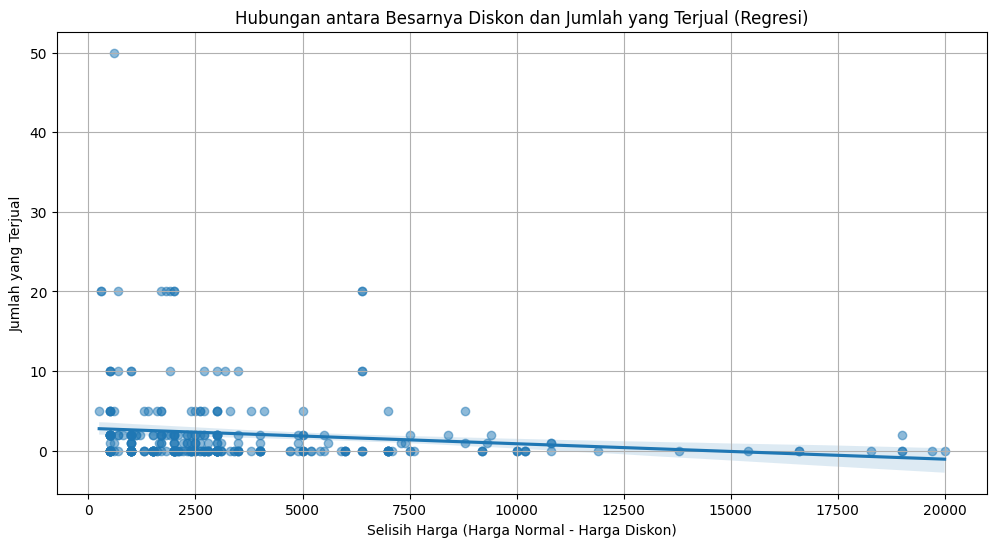

In [60]:
# Filter data untuk jumlah terjual hingga 50
filtered_data = data_combined[data_combined['terjual_prod'] <= 50]

# Drop rows with missing values in relevant columns
filtered_data = filtered_data.dropna(subset=['selisih_harga', 'terjual_prod'])

# Reset index to ensure alignment
X = filtered_data[['selisih_harga']].reset_index(drop=True)
y = filtered_data['terjual_prod'].reset_index(drop=True)

# Add constant to the independent variables
X = sm.add_constant(X)

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

# Visualize with regression line
plt.figure(figsize=(12, 6))
sns.regplot(x='selisih_harga', y='terjual_prod', data=filtered_data, scatter_kws={'alpha':0.5})
plt.title('Hubungan antara Besarnya Diskon dan Jumlah yang Terjual (Regresi)')
plt.xlabel('Selisih Harga (Harga Normal - Harga Diskon)')
plt.ylabel('Jumlah yang Terjual')
plt.grid(True)
plt.show()


## Insights
- Koefisien negatif ini dapat menunjukkan bahwa diskon yang lebih rendah dikaitkan dengan penjualan yang lebih tinggi.
- Nilai P-Value menunjukkan bahwa pengaruh harga diskon terhadap jumlah terjual adalah signifikan secara statistik (p-value < 0.05).

C:\Users\Jihan Aurelia\AppData\Local\Temp\ipykernel_31964\28208881.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dataframes['produk']['harga_prod'], bins=20, kde=True, palette='viridis')


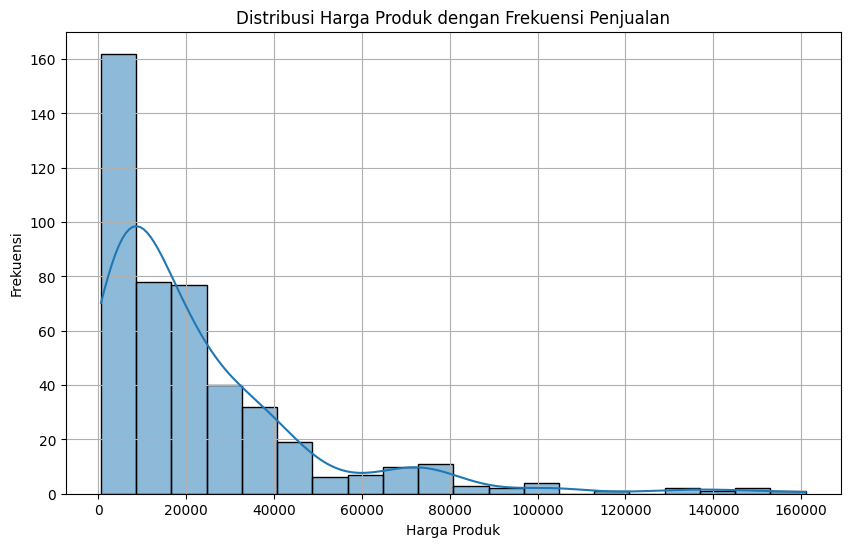

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(dataframes['produk']['harga_prod'], bins=20, kde=True, palette='viridis')
plt.title('Distribusi Harga Produk dengan Frekuensi Penjualan')
plt.xlabel('Harga Produk')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

## Insights
- Menunjukkan rentang harga produk dan frekuensi harga dalam rentang tersebut.
- Membantu dalam memahami kisaran harga yang paling umum dan menetapkan strategi harga yang lebih baik.

C:\Users\Jihan Aurelia\AppData\Local\Temp\ipykernel_31964\3252919494.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_terjual', y='nama_sup', data=top_companies_df, palette='viridis')


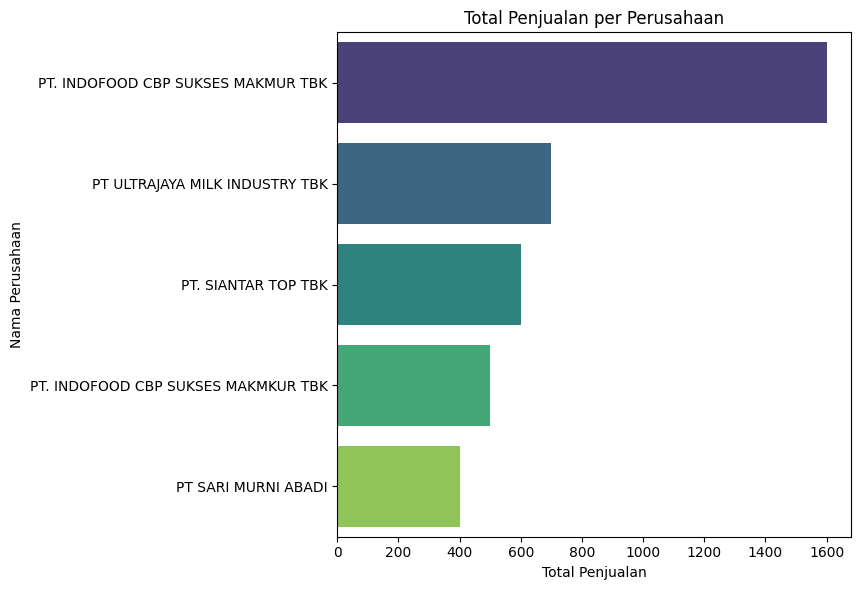

In [66]:
# Data Penjualan

import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi bar plot untuk total penjualan
plt.figure(figsize=(14, 6))

# Plot total penjualan
plt.subplot(1, 2, 1)
sns.barplot(x='total_terjual', y='nama_sup', data=top_companies_df, palette='viridis')
plt.title('Total Penjualan per Perusahaan')
plt.xlabel('Total Penjualan')
plt.ylabel('Nama Perusahaan')

plt.tight_layout()
plt.show()


### Visualisasi 1

C:\Users\Jihan Aurelia\AppData\Local\Temp\ipykernel_31964\2918072801.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='jumlah_produk_diskon', y='nama_sup', data=top_discount_products_df, palette='viridis')


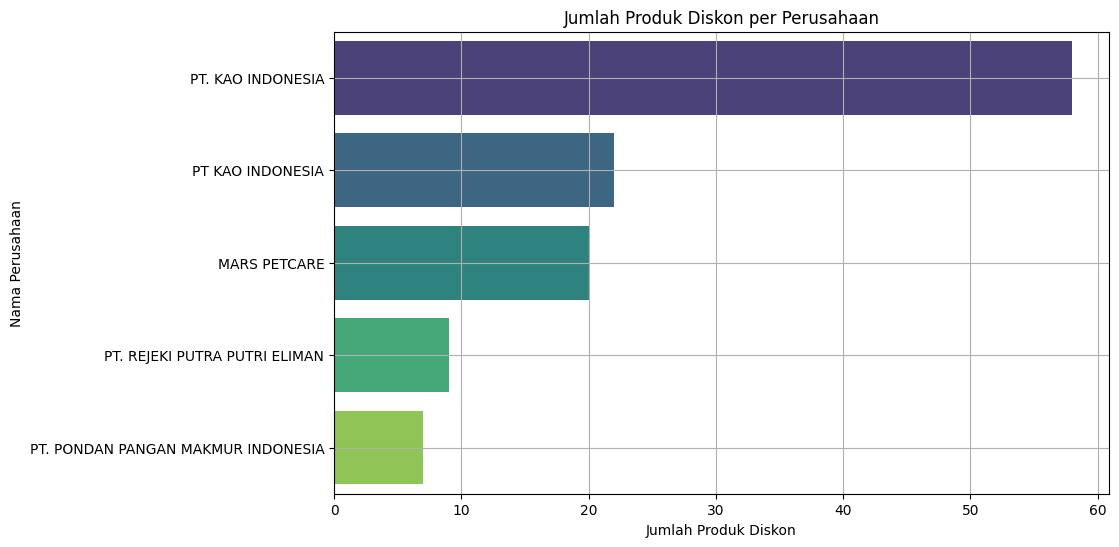

In [68]:
# Visualisasi bar plot untuk jumlah produk diskon
plt.figure(figsize=(10, 6))
sns.barplot(x='jumlah_produk_diskon', y='nama_sup', data=top_discount_products_df, palette='viridis')
plt.title('Jumlah Produk Diskon per Perusahaan')
plt.xlabel('Jumlah Produk Diskon')
plt.ylabel('Nama Perusahaan')
plt.grid(True)
plt.show()

### Visualisasi 2

C:\Users\Jihan Aurelia\AppData\Local\Temp\ipykernel_31964\3777751200.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='jumlah_produk', y='nama_sup', data=top_products_df, palette='viridis')


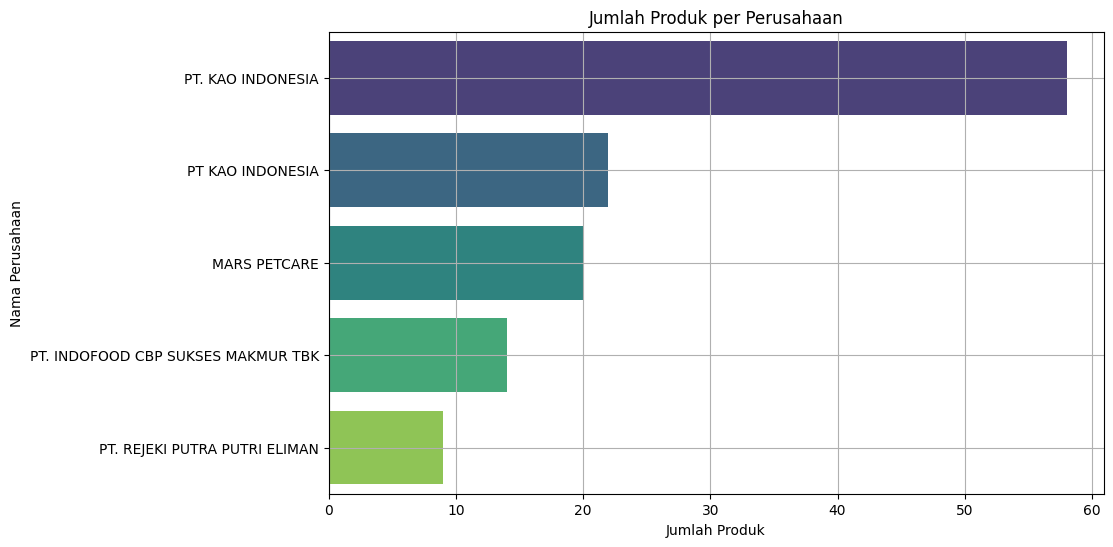

In [64]:
# Visualisasi bar plot untuk jumlah produk
plt.figure(figsize=(10, 6))
sns.barplot(x='jumlah_produk', y='nama_sup', data=top_products_df, palette='viridis')
plt.title('Jumlah Produk per Perusahaan')
plt.xlabel('Jumlah Produk')
plt.ylabel('Nama Perusahaan')
plt.grid(True)
plt.show()

## Insights
- Berdasarkan visualisasi 1, terlihat bahwa 5 perusahaan dengan penawaran diskon terbanyak tidak masuk di jajaran perusahaan dengan penjualan terbesar
- Berdasarkan visualisasi 2, terlihat bahwa 5 perusahaan dengan penawaran produk terbanyak justru masuk di jajaran perusahaan dengan penjualan terbesar
- Bisa disimpulkan bahwa konsumen cenderung tertarik dengan perusahaan yang memiliki variasi produk lebih banyak daripada diskon yang terlalu banyak